<a href="https://colab.research.google.com/github/vakilarora/myRepo2/blob/master/EVA_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

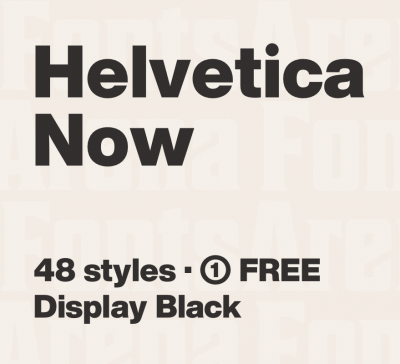

In [60]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

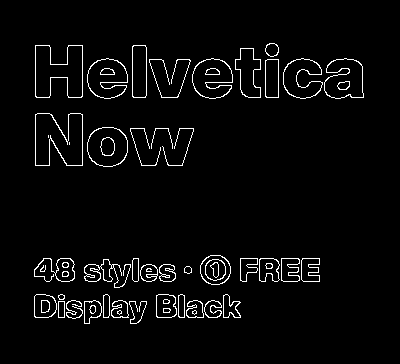

In [62]:
cv2_imshow(edges)

In [0]:
###Vertival Edge Detector
# An edge detector works on the principal of finding the difference of intensity of light in adjacent pixels.
# When nearby pixels are of same intensity they would cancel out each other and hence net result of 0 i.e a black output pixel
# Around vertical the pixel values are significantly different and hence output fixel will have a non zero value
#
#example image 8x8:
#  
#  [10 10 10 10 200 200 200 200]
#  [10 10 10 10 200 200 200 200]
#  [10 10 10 10 200 200 200 200]   [-1 0 1]
#  [10 10 10 10 200 200 200 200] x [-1 0 1]
#  [10 10 10 10 200 200 200 200]   [-1 0 1]
#  [10 10 10 10 200 200 200 200]
#  [10 10 10 10 200 200 200 200]
#  [10 10 10 10 200 200 200 200]
#  
#  
#  when in convoles in first half or second half of the image, it would produce zero results in hence black pixesl.
#  Whereas when it convolves around colum 3 to 5, it would output -190. Taking absolute value (190) is near white pixel.

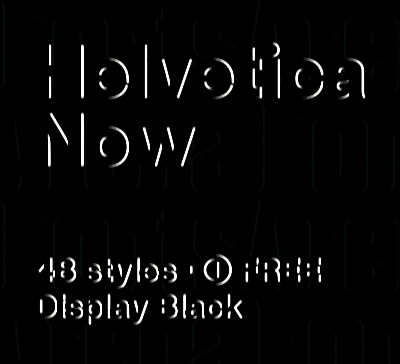

In [64]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = (cv2.filter2D(image,-1,kernel))

cv2_imshow(dst)


In [0]:
# Another vertcal edge detector by taking absolue value

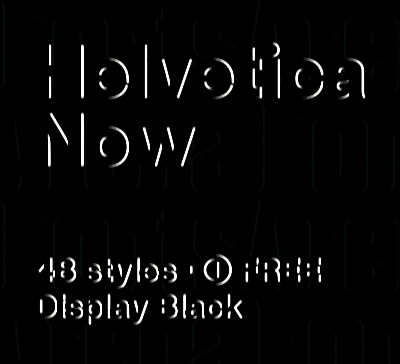

In [66]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = np.abs(cv2.filter2D(image,-1,kernel))

cv2_imshow(dst)


In [0]:
#Horizontal edge detector using same logic. Just transpose the kernel
#
#  [-1, -1, -1]
#  [ 0,  0,  0]
#  [ 1,  1,  1]

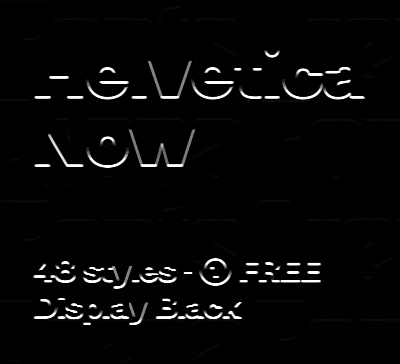

In [68]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = np.abs(cv2.filter2D(image,-1,kernel))

cv2_imshow(dst)

In [0]:
# 45 degree edge detector
# logic is same as horizonal and vertical edge detectors. We just need to roll over the 1 and -1 make this filter.
#  [ 1, -1,  0]
#  [-1,  0,  1]
#  [ 0,  1, -1]

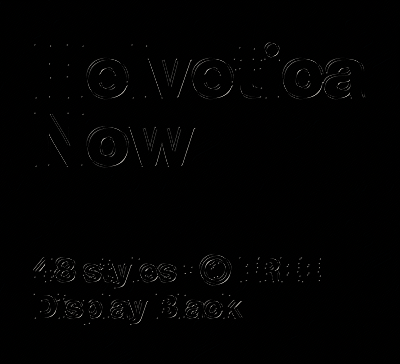

In [70]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,-1,0],[-1,0,1],[0,1,-1]])

dst = np.abs(cv2.filter2D(image,-1,kernel))

cv2_imshow(dst)

In [0]:
# Anothe 45 degree edge detector
# logic is same as horizonal and vertical edge detectors. We just need to roll over the 1 and -1 make this filter.
#  [ 0, -1,  1]
#  [ 1,  0, -1]
#  [-1,  1,  0]

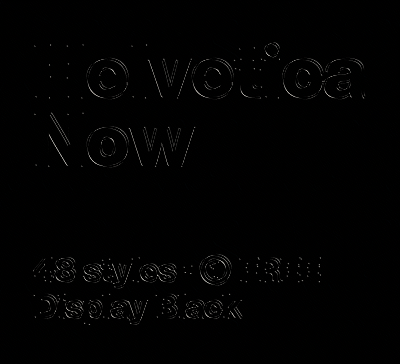

In [72]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,-1,1],[1,0,-1],[-1,1,0]])

dst = np.abs(cv2.filter2D(image,-1,kernel))

cv2_imshow(dst)

In [0]:
# Blur Kernel
# An image can be blurred by adding some random noise to it.
# the best way to add noise it add certain percentage of neery pixel intenity.
# sample kernel
#  [0.1, 0.1, 0.1]
#  [0.1, 0.2, 0.1]
#  [0.1, 0.1, 0.1]


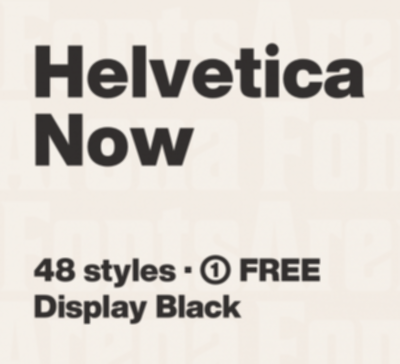

In [73]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0.1,0.1,0.1],[0.1,0.2,0.1],[0.1,0.1,0.1]])

dst = (cv2.filter2D(image,-1,kernel))

cv2_imshow(dst)

In [0]:
# Sharpen Kernel
# An image can be sharped by adding sharpening the edges.
# If we amplify the current pixel values and then subtract neighboring pixel values, it should sharpen the image.
# For brigher pixels values would increase as neighboring cells are near zero and for dull cells value would decrease because of brighter neighbors.
# sample kernel
#  [ 0, -1,  0]
#  [-1,  5, -1]
#  [ 0, -1,  0]


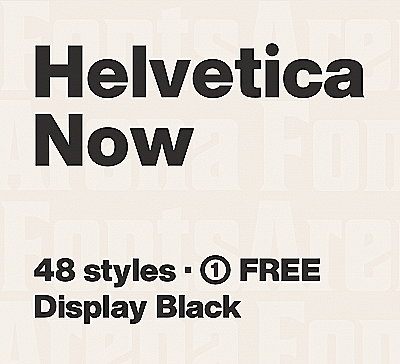

In [74]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = (cv2.filter2D(image,-1,kernel))

cv2_imshow(dst)

In [0]:
# Identity Functuion (Doesn't do anything)
# Ideally there is no need to do anything.
# Still one can use identity matrix kernel and result would be same as original picture
#
#   [0,0,0]
#   [0,1,0]
#   [0,0,0]

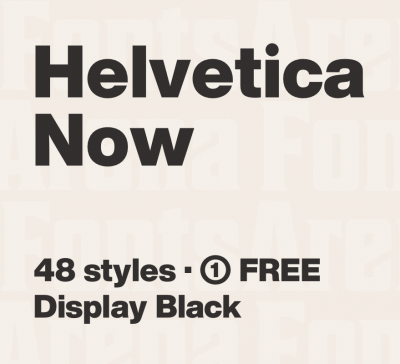

In [76]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = (cv2.filter2D(image,-1,kernel))

cv2_imshow(dst)